In [1]:
#!pip install spotipy # If using jupyter/anaconda and this module is installed, comment this out.

# Data Analytics Modules
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util 
import os

# Sqlite3 Module for Database
import sqlite3

# **Step 1**: Establishing Connection with Spotify API

In [2]:
# Spotify API Credentials (Obtained from Spotify Developer Account)
client_id = '8c16d4cbec99430a8b16c350d07b99c2'
secret = '238e17298f334142bb5667f90e6cd513'

In [3]:
# Spotify API Authorization/Connection
client_credentials_manager = SpotifyClientCredentials(client_id= client_id, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Retrieving Artist Data From Spotify API

In [4]:
""" Note to self: Convert into a function that enables user to enter artist of choice?"""
# Extracting Data From an Artist on Spotify
name = {'Bad Bunny'}
result = sp.search(name)

# Testing to see what data looks like
# result['tracks']['items'][0]['artists']

In [5]:
# Extract Artist Information/ Yields URI spotify:artist:4q3ewBCX7sLwd24euuV69X
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

# Pass in Artist information to get album data
sp_albums = sp.artist_albums(artist_uri, album_type='album')

In [6]:
albums = [] # Create a list to contain album names
album_uris = [] # Create a list that contains corresponding URI's

# Iterate through the extracted data and append names and uris to seperate lists
for i in range(len(sp_albums['items'])):
    albums.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

# **Step 2**: Cleaning Retrieved Artist Data

- **Stages of Data Breakdown**: 
- *Artist to Album*
- *Album to Songs*
- *Songs to Features*

In [7]:
# Create a dictionary for each album under spotify_albums
spotify_albums = {}

for album in album_uris:
    
    spotify_albums[album] = {}

    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []

    songs = sp.album_tracks(album)

    for i in range(len(songs['items'])):
        spotify_albums[album]['track_number'].append(songs['items'][i]['track_number'])
        spotify_albums[album]['id'].append(songs['items'][i]['id'])
        spotify_albums[album]['name'].append(songs['items'][i]['name'])
        spotify_albums[album]['uri'].append(songs['items'][i]['uri'])


In [8]:
# Create lists to append song data to from each dictionary within spotify_albums
for album in spotify_albums:
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['liveness'] = [] 
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    # Pulling song features and appending them to corresponding list
    for track in spotify_albums[album]['uri']:
        features = sp.audio_features(track)
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        popularity = sp.track(track)
        spotify_albums[album]['popularity'].append(popularity['popularity'])

# Constructing the DataFrame
- Create a dataframe for each album
- Append the corresponding albums to have the ability to conduct more advanced analysis (groupby)
- Combined each album dataframe into one master dataframe

In [9]:
# Album #1 
df = pd.DataFrame([spotify_albums[album_uris[0]]['name'],\
              spotify_albums[album_uris[0]]['acousticness'],\
              spotify_albums[album_uris[0]]['danceability'],\
              spotify_albums[album_uris[0]]['energy'],\
              spotify_albums[album_uris[0]]['liveness'],\
              spotify_albums[album_uris[0]]['tempo'],\
              spotify_albums[album_uris[0]]['valence'],\
              spotify_albums[album_uris[0]]['popularity']\
            ]).T

# Album #2
df2 = pd.DataFrame([spotify_albums[album_uris[1]]['name'],\
              spotify_albums[album_uris[1]]['acousticness'],\
              spotify_albums[album_uris[1]]['danceability'],\
              spotify_albums[album_uris[1]]['energy'],\
              spotify_albums[album_uris[1]]['liveness'],\
              spotify_albums[album_uris[1]]['tempo'],\
              spotify_albums[album_uris[1]]['valence'],\
              spotify_albums[album_uris[1]]['popularity']
             ]).T
# Album #3
df3 = pd.DataFrame([spotify_albums[album_uris[2]]['name'],\
              spotify_albums[album_uris[2]]['acousticness'],\
              spotify_albums[album_uris[2]]['danceability'],\
              spotify_albums[album_uris[2]]['energy'],\
              spotify_albums[album_uris[2]]['liveness'],\
              spotify_albums[album_uris[2]]['tempo'],\
              spotify_albums[album_uris[2]]['valence'],\
              spotify_albums[album_uris[2]]['popularity']\
             ]).T
# Album #4
df4 = pd.DataFrame([spotify_albums[album_uris[3]]['name'],\
              spotify_albums[album_uris[3]]['acousticness'],\
              spotify_albums[album_uris[3]]['danceability'],\
              spotify_albums[album_uris[3]]['energy'],\
              spotify_albums[album_uris[3]]['liveness'],\
              spotify_albums[album_uris[3]]['tempo'],\
              spotify_albums[album_uris[3]]['valence'],\
              spotify_albums[album_uris[3]]['popularity']\
                   ]).T

# Album #5
df5 = pd.DataFrame([spotify_albums[album_uris[4]]['name'],\
              spotify_albums[album_uris[4]]['acousticness'],\
              spotify_albums[album_uris[4]]['danceability'],\
              spotify_albums[album_uris[4]]['energy'],\
              spotify_albums[album_uris[4]]['liveness'],\
              spotify_albums[album_uris[4]]['tempo'],\
              spotify_albums[album_uris[4]]['valence'],\
              spotify_albums[album_uris[4]]['popularity']\
                   ]).T

# Appending Corresponding Album to Each Song
df['album'] = pd.Series(albums[0], index=df.index)
df2['album'] = pd.Series(albums[1], index=df2.index)
df3['album'] = pd.Series(albums[2], index=df3.index)
df4['album'] = pd.Series(albums[3], index=df4.index)
df5['album'] = pd.Series(albums[4], index=df5.index)

# Concatenate all album data frames into one.
data_set = pd.concat([df, df2, df3, df4, df5], ignore_index=True)

# Set Column names for data frame
data_set.columns = ['name','acousticness','danceability','energy','liveness','tempo','valence', 'popularity', 'album']

# Preview the combined Data Frame
data_set.head(10)


,name,acousticness,danceability,energy,liveness,tempo,valence,popularity,album
0,EL MUNDO ES MÍO,0.166,0.716,0.522,0.113,76.993,0.224,70,EL ÚLTIMO TOUR DEL MUNDO
1,TE MUDASTE,0.234,0.811,0.637,0.118,92.025,0.471,86,EL ÚLTIMO TOUR DEL MUNDO
2,HOY COBRÉ,0.0464,0.86,0.725,0.0994,145.001,0.375,74,EL ÚLTIMO TOUR DEL MUNDO
3,MALDITA POBREZA,0.139,0.762,0.861,0.0956,133.037,0.588,71,EL ÚLTIMO TOUR DEL MUNDO
4,LA NOCHE DE ANOCHE,0.0303,0.856,0.618,0.0866,81.993,0.391,91,EL ÚLTIMO TOUR DEL MUNDO
5,TE DESEO LO MEJOR,0.158,0.763,0.597,0.111,126.054,0.194,74,EL ÚLTIMO TOUR DEL MUNDO
6,YO VISTO ASÍ,0.0947,0.688,0.881,0.0804,123.013,0.677,76,EL ÚLTIMO TOUR DEL MUNDO
7,HACIENDO QUE ME AMAS,0.869,0.584,0.411,0.0955,169.934,0.412,80,EL ÚLTIMO TOUR DEL MUNDO
8,BOOKER T,0.114,0.883,0.6,0.0931,113.903,0.691,81,EL ÚLTIMO TOUR DEL MUNDO
9,LA DROGA,0.0439,0.643,0.727,0.123,90.019,0.295,73,EL ÚLTIMO TOUR DEL MUNDO


# **Step 3**: Descriptive Statistics
- Looped through each feature to get descriptive statistics for all of them.

In [10]:
# Descriptive Statistics for Every Feature of All Artists Songs
features = ['acousticness','danceability','energy','liveness','tempo','valence', 'popularity']

print(f"Count of Songs Analyzed: {len(data_set)}\n")

for feature in features:
    print(f"{feature} min: {round(data_set[feature].min(),4)}")
    print(f"{feature} max: {round(data_set[feature].max(),4)}")
    print(f"{feature} mean: {round(data_set[feature].mean(),4)}")
    print(f"{feature} standard dev: {round(data_set[feature].std(),4)}")
    print(f"{feature} variance: {round(data_set[feature].var(),4)}")
    print(f"{feature} 25th percentile: {round(data_set[feature].quantile(.25),4)}")
    print(f"{feature} 50th percentile: {round(data_set[feature].quantile(.5),4)}")
    print(f"{feature} 75th percentile: {round(data_set[feature].quantile(.75),4)}\n")

Count of Songs Analyzed: 69

acousticness min: 0.0103
acousticness max: 0.869
acousticness mean: 0.2096
acousticness standard dev: 0.2109
acousticness variance: 0.0445
acousticness 25th percentile: 0.0589
acousticness 50th percentile: 0.139
acousticness 75th percentile: 0.287

danceability min: 0.43
danceability max: 0.9
danceability mean: 0.7441
danceability standard dev: 0.1068
danceability variance: 0.0114
danceability 25th percentile: 0.683
danceability 50th percentile: 0.762
danceability 75th percentile: 0.826

energy min: 0.379
energy max: 0.881
energy mean: 0.6639
energy standard dev: 0.1229
energy variance: 0.0151
energy 25th percentile: 0.58
energy 50th percentile: 0.656
energy 75th percentile: 0.764

liveness min: 0.0611
liveness max: 0.659
liveness mean: 0.1563
liveness standard dev: 0.113
liveness variance: 0.0128
liveness 25th percentile: 0.098
liveness 50th percentile: 0.108
liveness 75th percentile: 0.153

tempo min: 76.993
tempo max: 191.911
tempo mean: 121.5357
tempo s

# **Step 4**: Data Visualization
- Created Histograms to visualize the distribution of each feature across all of Bad Bunny's songs.
- Created Scatterplots to visualize the relationship between each feature and popularity for all of Bad Bunny's songs.

In [11]:
# Chart Color Scheme
dark_red = ['#892A2A']
color_scheme = sns.color_palette(dark_red)
sns.set_palette(color_scheme)
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Bad Bunny Songs Valence Distribution')

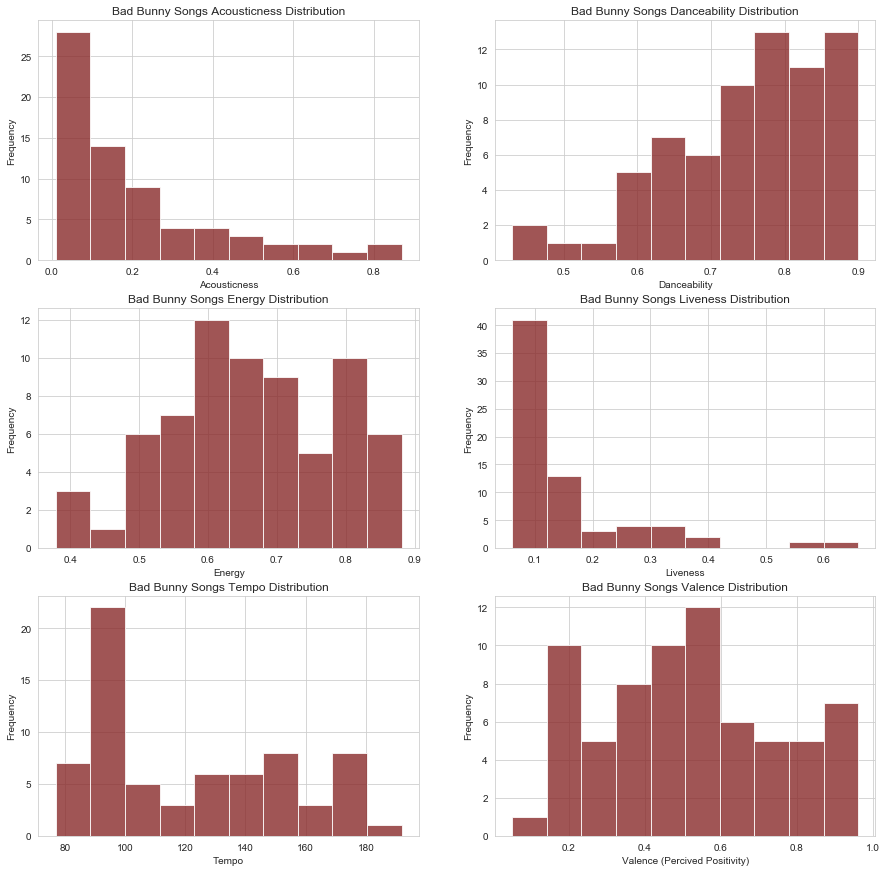

In [12]:
sub_fig, axs = plt.subplots(3,2,figsize =(15,15))

axs[0,0].hist(data_set['acousticness'], alpha= .8, bins= 10)
axs[0,0].set_xlabel('Acousticness')
axs[0,0].set_ylabel('Frequency')
axs[0,0].set_title('Bad Bunny Songs Acousticness Distribution')

axs[0,1].hist(data_set['danceability'], alpha= .8, bins= 10)
axs[0,1].set_xlabel('Danceability')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title('Bad Bunny Songs Danceability Distribution')

axs[1,0].hist(data_set['energy'], alpha= .8, bins= 10)
axs[1,0].set_xlabel('Energy')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_title('Bad Bunny Songs Energy Distribution')

axs[1,1].hist(data_set['liveness'], alpha= .8, bins= 10)
axs[1,1].set_xlabel('Liveness')
axs[1,1].set_ylabel('Frequency')
axs[1,1].set_title('Bad Bunny Songs Liveness Distribution')

axs[2,0].hist(data_set['tempo'], alpha= .8, bins= 10)
axs[2,0].set_xlabel('Tempo')
axs[2,0].set_ylabel('Frequency')
axs[2,0].set_title('Bad Bunny Songs Tempo Distribution')

axs[2,1].hist(data_set['valence'], alpha= .8, bins= 10)
axs[2,1].set_xlabel('Valence (Percived Positivity)')
axs[2,1].set_ylabel('Frequency')
axs[2,1].set_title('Bad Bunny Songs Valence Distribution')

Text(0.5, 1.0, 'Valence and Popularity Scatterplot')

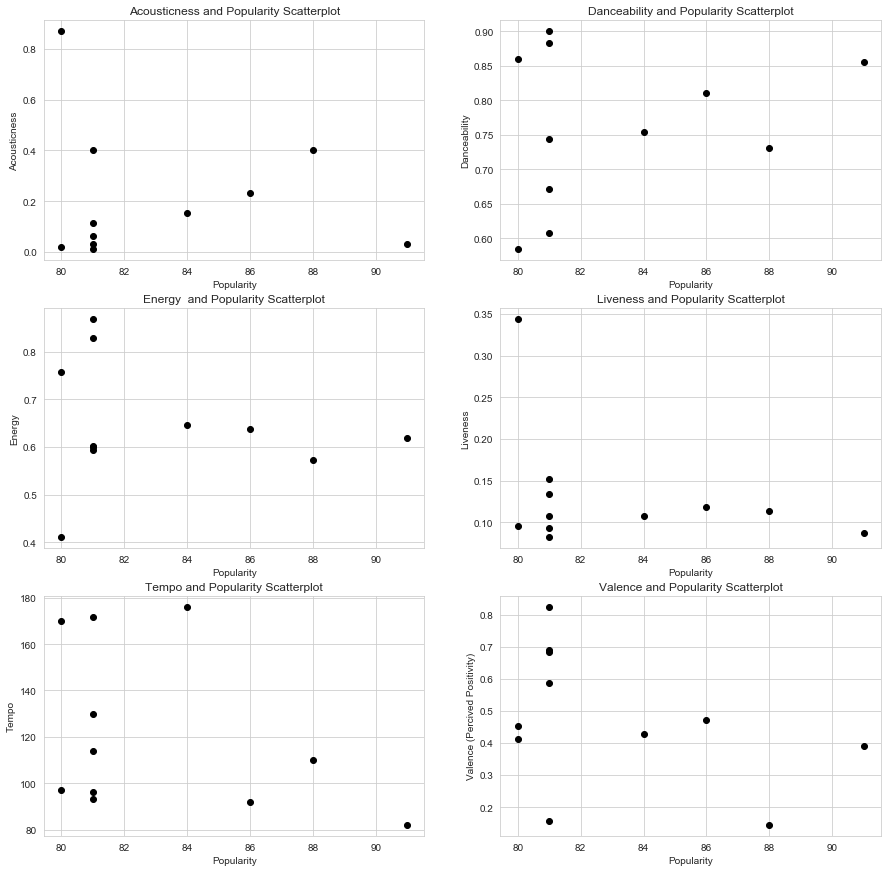

In [16]:
sub_fig, axs = plt.subplots(3,2,figsize =(15,15))

data_set2 = data_set[data_set['popularity'] >= 80]

axs[0,0].plot(data_set2['popularity'], data_set2['acousticness'], 'o' , color= 'black')
axs[0,0].set_xlabel('Popularity')
axs[0,0].set_ylabel('Acousticness')
axs[0,0].set_title('Acousticness and Popularity Scatterplot')

axs[0,1].plot(data_set2['popularity'], data_set2['danceability'], 'o' , color= 'black')
axs[0,1].set_xlabel('Popularity')
axs[0,1].set_ylabel('Danceability')
axs[0,1].set_title('Danceability and Popularity Scatterplot')

axs[1,0].plot(data_set2['popularity'], data_set2['energy'], 'o' , color= 'black')
axs[1,0].set_ylabel('Energy')
axs[1,0].set_xlabel('Popularity')
axs[1,0].set_title('Energy  and Popularity Scatterplot')

axs[1,1].plot(data_set2['popularity'], data_set2['liveness'], 'o' , color= 'black')
axs[1,1].set_ylabel('Liveness')
axs[1,1].set_xlabel('Popularity')
axs[1,1].set_title('Liveness and Popularity Scatterplot')

axs[2,0].plot(data_set2['popularity'], data_set2['tempo'], 'o' , color= 'black')
axs[2,0].set_ylabel('Tempo')
axs[2,0].set_xlabel('Popularity')
axs[2,0].set_title('Tempo and Popularity Scatterplot')

axs[2,1].plot(data_set2['popularity'], data_set2['valence'], 'o' , color= 'black')
axs[2,1].set_ylabel('Valence (Percived Positivity)')
axs[2,1].set_xlabel('Popularity')
axs[2,1].set_title('Valence and Popularity Scatterplot')

# **Step 5**: Database Export

In [91]:
# Establish DB Connection to Sqlite3
db = sqlite3.connect(r"C:\sqlite\CIS9650DAFP.db")

In [92]:
# Test DB To Ensure Proper Loading
pd.read_sql("SELECT * FROM bad_bunny", db)

,name,acousticness,danceability,energy,liveness,tempo,valence,popularity,album


In [93]:
# Adding dataframe (data_set) into the db table
data_set.to_sql('bad_bunny', db, if_exists='append', index= False)

In [94]:
# Checking
pd.read_sql("SELECT * FROM bad_bunny", db)

,name,acousticness,danceability,energy,liveness,tempo,valence,popularity,album
0,EL MUNDO ES MÍO,0.1660,0.716,0.522,0.1130,76.993,0.224,70,EL ÚLTIMO TOUR DEL MUNDO
1,TE MUDASTE,0.2340,0.811,0.637,0.1180,92.025,0.471,86,EL ÚLTIMO TOUR DEL MUNDO
2,HOY COBRÉ,0.0464,0.860,0.725,0.0994,145.001,0.375,74,EL ÚLTIMO TOUR DEL MUNDO
3,MALDITA POBREZA,0.1390,0.762,0.861,0.0956,133.037,0.588,71,EL ÚLTIMO TOUR DEL MUNDO
4,LA NOCHE DE ANOCHE,0.0303,0.856,0.618,0.0866,81.993,0.391,91,EL ÚLTIMO TOUR DEL MUNDO
...,...,...,...,...,...,...,...,...,...
64,La Romana,0.0327,0.655,0.725,0.0611,125.800,0.326,75,X 100PRE
65,Como Antes,0.6680,0.767,0.379,0.2170,103.956,0.252,69,X 100PRE
66,RLNDT,0.2630,0.600,0.528,0.5880,108.025,0.142,67,X 100PRE
67,Estamos Bien,0.8210,0.759,0.536,0.1070,119.883,0.439,73,X 100PRE
